In [59]:
import polars as pl
import pandas as pd
import plotly.express as px
import os
import re


starting batch 1 of 69
starting batch 2 of 69
starting batch 3 of 69
starting batch 4 of 69
starting batch 5 of 69
starting batch 6 of 69
starting batch 7 of 69
starting batch 8 of 69
starting batch 9 of 69
starting batch 10 of 69
starting batch 11 of 69
starting batch 12 of 69
starting batch 13 of 69
starting batch 14 of 69
starting batch 15 of 69
starting batch 16 of 69
starting batch 17 of 69
starting batch 18 of 69
starting batch 19 of 69
starting batch 20 of 69
starting batch 21 of 69
starting batch 22 of 69
starting batch 23 of 69
starting batch 24 of 69
starting batch 25 of 69
starting batch 26 of 69
starting batch 27 of 69
starting batch 28 of 69
starting batch 29 of 69
starting batch 30 of 69
starting batch 31 of 69
starting batch 32 of 69
starting batch 33 of 69
starting batch 34 of 69
starting batch 35 of 69
starting batch 36 of 69
starting batch 37 of 69
starting batch 38 of 69
starting batch 39 of 69
starting batch 40 of 69
starting batch 41 of 69
starting batch 42 of 69
s

## ML Time

### also want to explore effect ofbacteria on mental health

In [58]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import tensorflow as tf
import matplotlib.pyplot as plt
import shap
import re

In [62]:
gi_training = pd.read_parquet('../data/processed/gi_training.parquet')

x = gi_training.drop(columns=['sample','disease_present'])

y = gi_training['disease_present']


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

0.7727272727272727


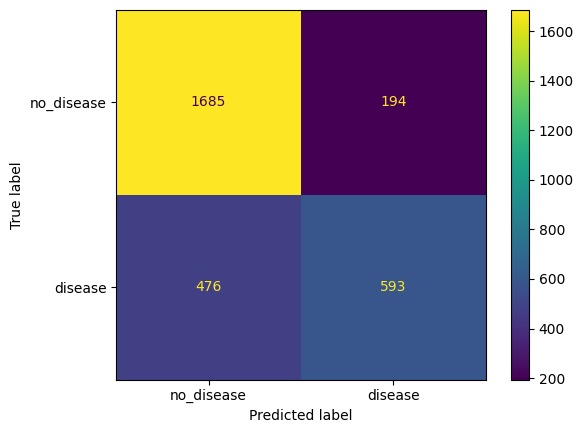

In [64]:
# create model instance
bst = xgb.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.08, objective='binary:logistic')
# fit model
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)
print(accuracy_score(y_test,preds))
cm = confusion_matrix(y_test,preds)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=['no_disease','disease'])
cm_disp.plot()
plt.show()

ROC AUC: 0.839


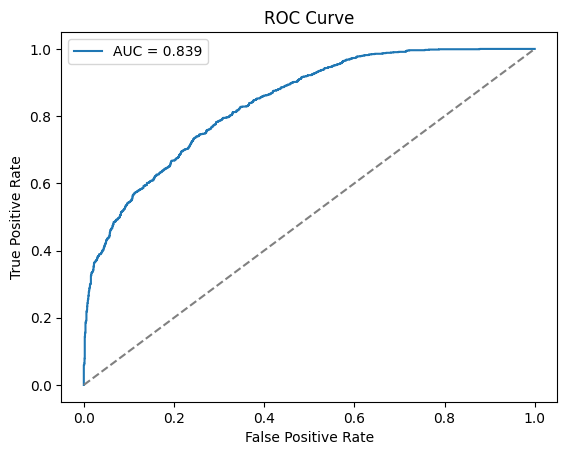

In [28]:
y_proba = bst.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.3f}")

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


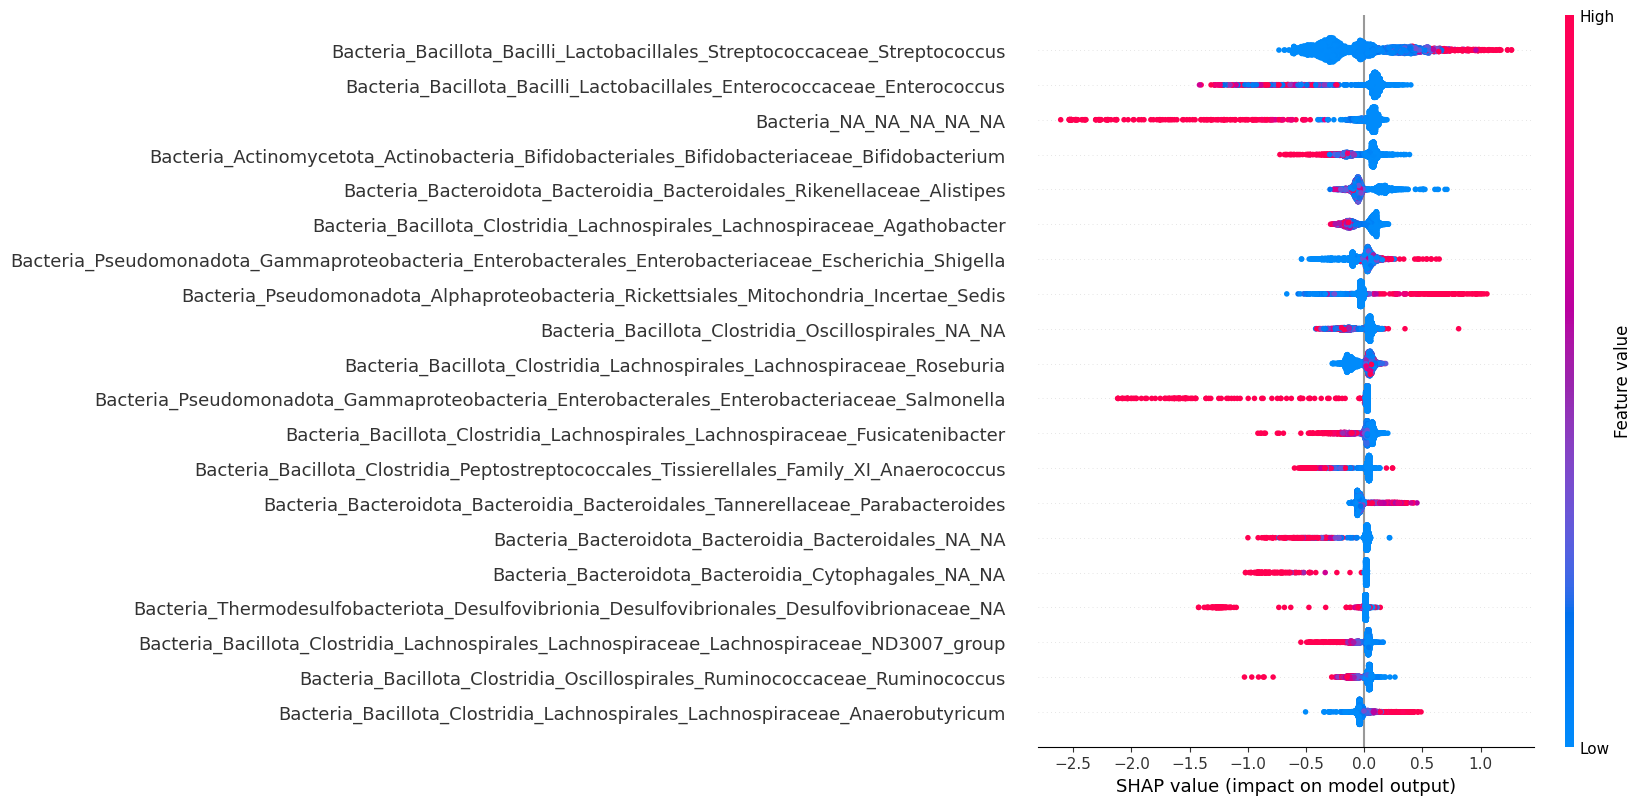

In [39]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_test)

# Basic summary plot (shows feature importance + impact direction)
shap.summary_plot(shap_values, x_test)